## Importing Libraries

In [1]:
from math import ceil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import os

import matplotlib.pyplot as plt
#import torchvision.transforms as transforms
#import torchvision.datasets as datasets
import torch.utils.data as td
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
from collections import defaultdict

import numpy as np
from scipy.signal import savgol_filter
import time
from torchvision import models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import pickle
from thop import profile


import json
from PIL import Image as PilImage

## Setting Path

In [2]:
path = new_path = "C:/Users/vshar/Downloads/Dataset 1/Dataset 1/Colorectal Cancer"
subDirectories = os.listdir(new_path)
saveFilePath="C:/Users/vshar/Documents/hyperparameters.pkl"
saveModelPath="C:/Users/vshar/Documents"

## Set device to GPU

In [3]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Reading the labels of the Dataset

In [4]:

print(subDirectories)

enu = range(len(subDirectories))
labels_map={}
for enu,subDirectory in enumerate(subDirectories):
    labels_map.update({enu:subDirectory})
print(labels_map)
print("The number of labels in the dataset = %s"% len(labels_map))
print("The \'%s\' device is being used to process the dataset"%device)


['MUS', 'NORM', 'STR']
{0: 'MUS', 1: 'NORM', 2: 'STR'}
The number of labels in the dataset = 3
The 'cuda' device is being used to process the dataset


## Display Dataset Images

In [5]:
def displayImages(t_dataset,imageFlag):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    if imageFlag==0:
      figure.suptitle("Images before preprocessing")
    else:
     figure.suptitle("Images after preprocessing")   
    for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(t_dataset), size=(1,)).item()
      img, label = t_dataset[sample_idx]
      img=np.array(img).transpose((1,2,0))
      figure.add_subplot(rows, cols, i)
      plt.title(labels_map[label])
      plt.axis("off")
      plt.imshow(img.squeeze())
    print("\n\n\n################################################\n\n\n")
    plt.show()

## Load Data

In [6]:
def data_loader(data_dir_input,batch_sizeGiven,input_size,flag=0,test_split=0.1,val_split=0.1):
# Define dataset directory and transforms
  data_dir = data_dir_input #
  
  data_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
  ])


  if flag==1:
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),   
  ]))
    displayImages(test_temp_dataset,0)
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=data_transform)
    displayImages(test_temp_dataset,1)

    data = datasets.ImageFolder(root=data_dir, transform=data_transform)
    # Define train, validation, and test dataset
    dataset_size = len(data)
    test_size = int(test_split * dataset_size)
    val_size = int(val_split * dataset_size)
    train_size = dataset_size - (test_size + val_size)
    train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
    print("Train Datset Size After Split",len(train_dataset))
    print("Test Datset Size After Split",len(test_dataset))
    print("Validation Datset Size After Split",len(val_dataset))


    # Create a dictionary to store the number of images per class
    num_images_per_class = defaultdict(int)

    # Iterate over the training dataset and count the number of images in each class
    for image, label in train_dataset:
        num_images_per_class[label] += 1

    # Print the number of images per class
    for label, num_images in num_images_per_class.items():
        print(f"Class {label}: {num_images} images")
  

    # Define the number of classes and generate a list of colors
    num_classes = len(num_images_per_class)
    colors = plt.cm.Set1(np.linspace(0, 1, num_classes))

    # Plot the number of images per class as a bar plot
    plt.bar(num_images_per_class.keys(), num_images_per_class.values(), color=colors)
    #plt.pie(num_images_per_class.values(), labels=num_images_per_class.keys(), colors=colors, autopct='%1.1f%%')
    # Add axis labels and title
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.title("Number of images per class in the dataset")

    # Create a legend
    labels = [f"Class {label}" for label in num_images_per_class.keys()]
    plt.legend([plt.bar(0, 0, color=colors[i])[0] for i in range(len(num_images_per_class))], labels,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.rcParams["figure.figsize"] = (40,15)
    # Show the plot
    plt.show()
    
    return  

  data = datasets.ImageFolder(root=data_dir, transform=data_transform)
  # Define train, validation, and test dataset
  dataset_size = len(data)
  test_size = int(test_split * dataset_size)
  val_size = int(val_split * dataset_size)
  train_size = dataset_size - (test_size + val_size)
  train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
 
  train_loader = DataLoader(train_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) #shuffle 
  val_loader = DataLoader(val_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) # shuffle working


  return train_loader,test_loader,val_loader

## Dataset images before and after Preprocessing




################################################





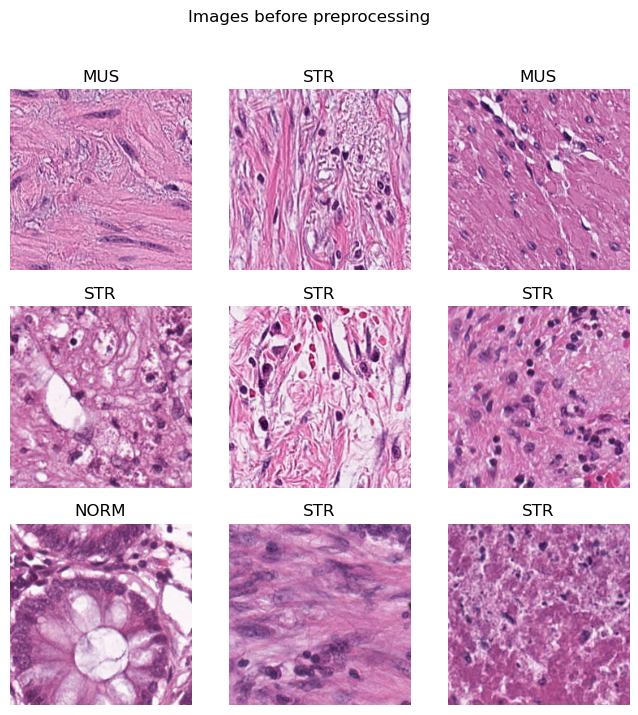

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).





################################################





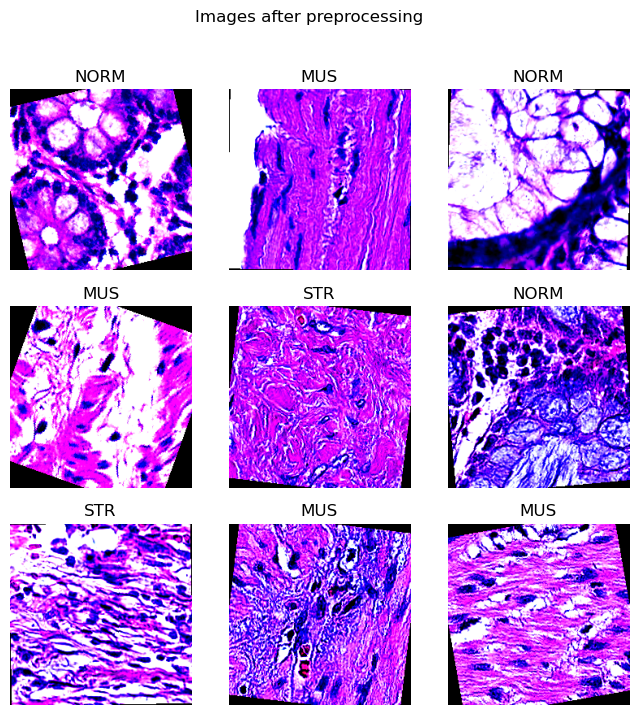

Train Datset Size After Split 4800
Test Datset Size After Split 600
Validation Datset Size After Split 600
Class 0: 1594 images
Class 1: 1627 images
Class 2: 1579 images


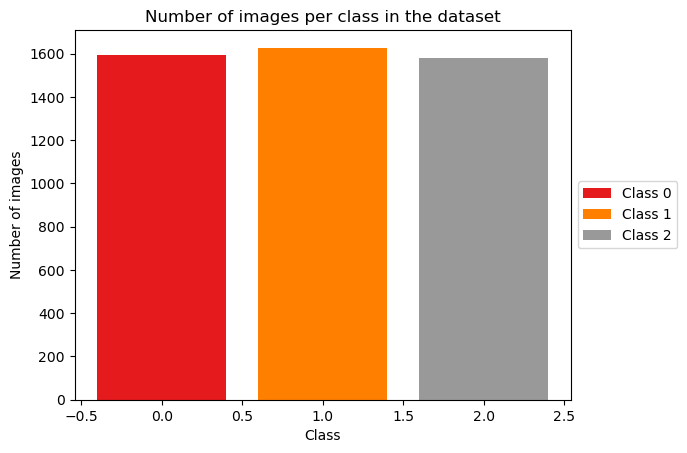

In [7]:
batch_size=32
inputDimension=(224,224)
data_loader(path,batch_size,inputDimension,flag=1)

## Training Loop

In [8]:
def train(num_epochsGiven, model, train_loader, criterion, optimizer,val_loader):
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print("Device: {}".format(device))
  model.to(device)
  Accuracy=[]
  validAccuracy=[]
  stepAccuracyTotal=[]
  stepAccuracyValidationTotal=[]
  stepLossTotal=[]
  Loss = []
  num_epochs = num_epochsGiven
  total_steps = len(train_loader)
  t1 = time.time()
  total,correct,loss=0,0,0
  for epoch in range(num_epochs):
      stepAcc=[]
      stepLoss=[]    
      for i, data in enumerate(train_loader):
          images, labels = data[0].to(device), data[1].to(device)
          # Forward pass
          outputs = model(images)
          loss = criterion(outputs, labels)
          # Backprop and optimisation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          # Train accuracy
          total = labels.size(0)
          _,predicted = torch.max(outputs.data, 1)
          correct = (predicted == labels).sum().item()
          stepAcc.append((correct / total) * 100)
          stepLoss.append(loss.item())
          if (i + 1) % 30 == 0:
              stepAccuracyTotal.append((correct / total) * 100)
              stepLossTotal.append(loss.item())
              correct_v = 0
              total_v = 0
              for dataVal in val_loader:
                  images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
                  outputs = model(images_v)
                  _, predicted = torch.max(outputs.data, 1)
                  correct_v += (predicted == labels_v).sum().item()
                  total_v += labels_v.size(0) 
              stepAccuracyValidationTotal.append((correct_v / total_v) * 100)
              print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%,Validation Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, i + 1, total_steps, loss.item(),(correct / total) * 100,(correct_v / total_v) * 100))     
      correct_v = 0
      total_v = 0
      for dataVal in val_loader:
          images_v, labels_v = dataVal[0].to(device), dataVal[1].to(device)
          outputs = model(images_v)
          _, predicted = torch.max(outputs.data, 1)
          correct_v += (predicted == labels_v).sum().item()
          total_v += labels_v.size(0)        
      Accuracy.append(sum(stepAcc)/len(stepAcc))
      validAccuracy.append((correct_v / total_v) * 100)
      Loss.append(sum(stepLoss)/len(stepLoss))
  endTime =  time.time()
  print("######## Training Finished in {} seconds ###########".format(endTime-t1))
  print("######## Training timer per epoch is {} seconds ###########".format((endTime-t1)/num_epochsGiven))
  return Loss,Accuracy,model,validAccuracy,stepAccuracyTotal,stepAccuracyValidationTotal,stepLossTotal

## Testing the model

In [9]:
def test(model, device, test_loader):
  model.eval() 
  y_truth=[]
  y_predicted=[]
  cm=[]
  G_correct=0
  G_total=0
  
  with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          y_truth+=labels.cpu().numpy().tolist()
          y_predicted+=predicted.cpu().numpy().tolist()
      print('Test Accuracy of the model on the {} test images: {} %'.format(total, (correct / total) * 100))
      cm= confusion_matrix(y_truth,y_predicted)
      G_total=total
      G_correct=correct
  print(classification_report(y_truth,y_predicted))
  return cm,((G_correct / G_total) * 100)

## Hyperparameter Tuning

Learning Rate: 1e-05, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.8597, Accuracy: 70.31%,Validation Accuracy: 62.67%
Epoch [2/10], Step [30/38], Loss: 0.6383, Accuracy: 74.22%,Validation Accuracy: 72.83%
Epoch [3/10], Step [30/38], Loss: 0.5562, Accuracy: 76.56%,Validation Accuracy: 78.17%
Epoch [4/10], Step [30/38], Loss: 0.5060, Accuracy: 78.12%,Validation Accuracy: 77.83%
Epoch [5/10], Step [30/38], Loss: 0.3647, Accuracy: 86.72%,Validation Accuracy: 81.50%
Epoch [6/10], Step [30/38], Loss: 0.5482, Accuracy: 80.47%,Validation Accuracy: 81.83%
Epoch [7/10], Step [30/38], Loss: 0.4629, Accuracy: 84.38%,Validation Accuracy: 84.67%
Epoch [8/10], Step [30/38], Loss: 0.3963, Accuracy: 83.59%,Validation Accuracy: 86.00%
Epoch [9/10], Step [30/38], Loss: 0.4833, Accuracy: 80.47%,Validation Accuracy: 88.50%
Epoch [10/10], Step [30/38], Loss: 0.4103, Accuracy: 85.16%,Validation Accuracy: 88.50%
######## Tra

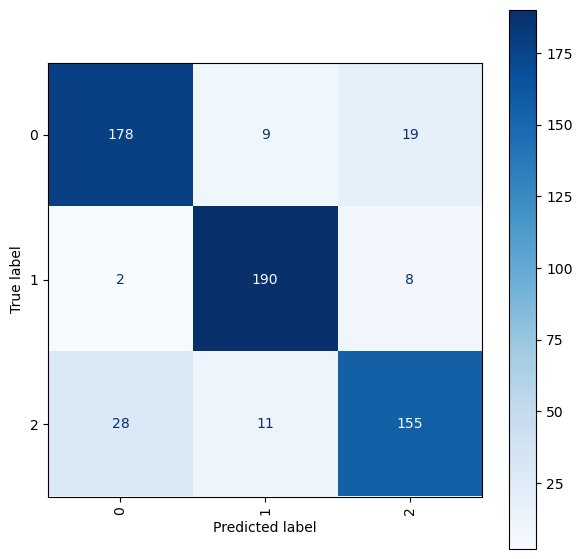

Learning Rate: 1e-05, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.9120, Accuracy: 57.81%,Validation Accuracy: 54.17%
Epoch [1/10], Step [60/75], Loss: 0.7166, Accuracy: 71.88%,Validation Accuracy: 67.33%
Epoch [2/10], Step [30/75], Loss: 0.5932, Accuracy: 79.69%,Validation Accuracy: 73.67%
Epoch [2/10], Step [60/75], Loss: 0.6753, Accuracy: 67.19%,Validation Accuracy: 76.17%
Epoch [3/10], Step [30/75], Loss: 0.4726, Accuracy: 82.81%,Validation Accuracy: 77.17%
Epoch [3/10], Step [60/75], Loss: 0.3504, Accuracy: 84.38%,Validation Accuracy: 79.00%
Epoch [4/10], Step [30/75], Loss: 0.5796, Accuracy: 73.44%,Validation Accuracy: 80.50%
Epoch [4/10], Step [60/75], Loss: 0.3887, Accuracy: 84.38%,Validation Accuracy: 82.83%
Epoch [5/10], Step [30/75], Loss: 0.3475, Accuracy: 89.06%,Validation Accuracy: 84.17%
Epoch [5/10], Step [60/75], Loss: 0.5515, Accuracy: 82.81%,Validation Accuracy: 83.67%
Epoch [6/10], 

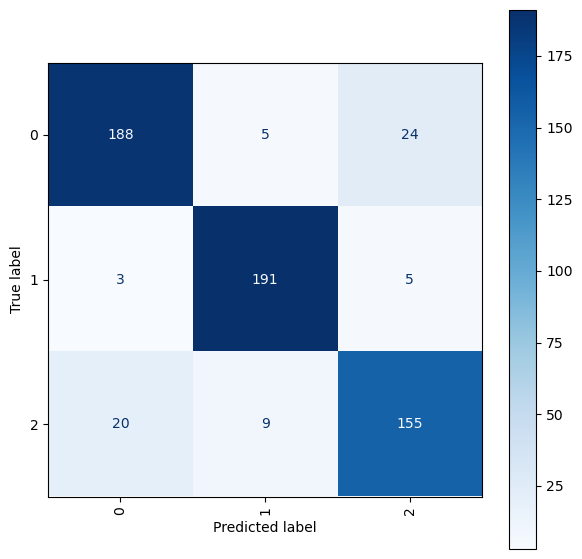

Learning Rate: 1e-05, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.9500, Accuracy: 62.50%,Validation Accuracy: 53.83%
Epoch [1/10], Step [60/150], Loss: 0.8515, Accuracy: 62.50%,Validation Accuracy: 60.00%
Epoch [1/10], Step [90/150], Loss: 0.8285, Accuracy: 62.50%,Validation Accuracy: 67.00%
Epoch [1/10], Step [120/150], Loss: 0.7139, Accuracy: 62.50%,Validation Accuracy: 70.83%
Epoch [1/10], Step [150/150], Loss: 0.8975, Accuracy: 65.62%,Validation Accuracy: 71.50%
Epoch [2/10], Step [30/150], Loss: 0.7858, Accuracy: 59.38%,Validation Accuracy: 72.83%
Epoch [2/10], Step [60/150], Loss: 0.4929, Accuracy: 78.12%,Validation Accuracy: 77.00%
Epoch [2/10], Step [90/150], Loss: 0.4329, Accuracy: 87.50%,Validation Accuracy: 76.83%
Epoch [2/10], Step [120/150], Loss: 0.9875, Accuracy: 59.38%,Validation Accuracy: 78.17%
Epoch [2/10], Step [150/150], Loss: 0.3791, Accuracy: 87.50%,Validation Accuracy: 76.33%


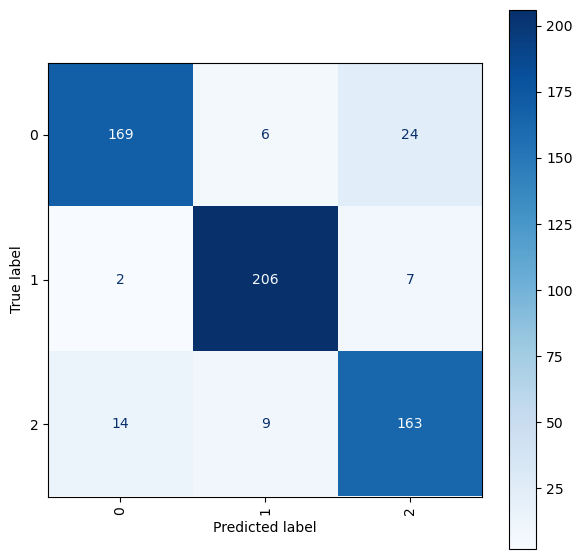

Learning Rate: 5e-05, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.6188, Accuracy: 75.00%,Validation Accuracy: 80.00%
Epoch [2/10], Step [30/38], Loss: 0.4615, Accuracy: 82.03%,Validation Accuracy: 81.67%
Epoch [3/10], Step [30/38], Loss: 0.4256, Accuracy: 82.03%,Validation Accuracy: 84.67%
Epoch [4/10], Step [30/38], Loss: 0.3726, Accuracy: 89.06%,Validation Accuracy: 88.67%
Epoch [5/10], Step [30/38], Loss: 0.2227, Accuracy: 89.84%,Validation Accuracy: 90.67%
Epoch [6/10], Step [30/38], Loss: 0.3759, Accuracy: 87.50%,Validation Accuracy: 89.00%
Epoch [7/10], Step [30/38], Loss: 0.2203, Accuracy: 93.75%,Validation Accuracy: 89.33%
Epoch [8/10], Step [30/38], Loss: 0.1630, Accuracy: 93.75%,Validation Accuracy: 89.33%
Epoch [9/10], Step [30/38], Loss: 0.1815, Accuracy: 93.75%,Validation Accuracy: 91.33%
Epoch [10/10], Step [30/38], Loss: 0.1063, Accuracy: 96.09%,Validation Accuracy: 92.50%
######## Tra

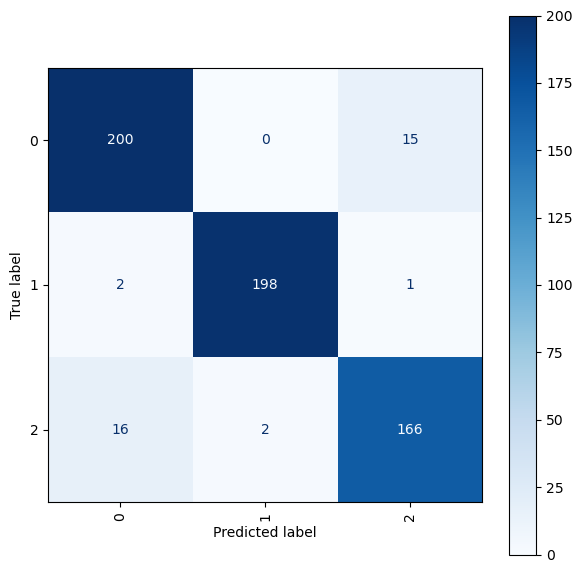

Learning Rate: 5e-05, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.3981, Accuracy: 84.38%,Validation Accuracy: 77.83%
Epoch [1/10], Step [60/75], Loss: 0.5388, Accuracy: 76.56%,Validation Accuracy: 77.83%
Epoch [2/10], Step [30/75], Loss: 0.4808, Accuracy: 81.25%,Validation Accuracy: 81.17%
Epoch [2/10], Step [60/75], Loss: 0.3274, Accuracy: 85.94%,Validation Accuracy: 84.17%
Epoch [3/10], Step [30/75], Loss: 0.3946, Accuracy: 82.81%,Validation Accuracy: 87.00%
Epoch [3/10], Step [60/75], Loss: 0.2871, Accuracy: 85.94%,Validation Accuracy: 87.50%
Epoch [4/10], Step [30/75], Loss: 0.4142, Accuracy: 82.81%,Validation Accuracy: 86.50%
Epoch [4/10], Step [60/75], Loss: 0.2204, Accuracy: 89.06%,Validation Accuracy: 89.00%
Epoch [5/10], Step [30/75], Loss: 0.2090, Accuracy: 92.19%,Validation Accuracy: 90.50%
Epoch [5/10], Step [60/75], Loss: 0.1174, Accuracy: 95.31%,Validation Accuracy: 90.00%
Epoch [6/10], 

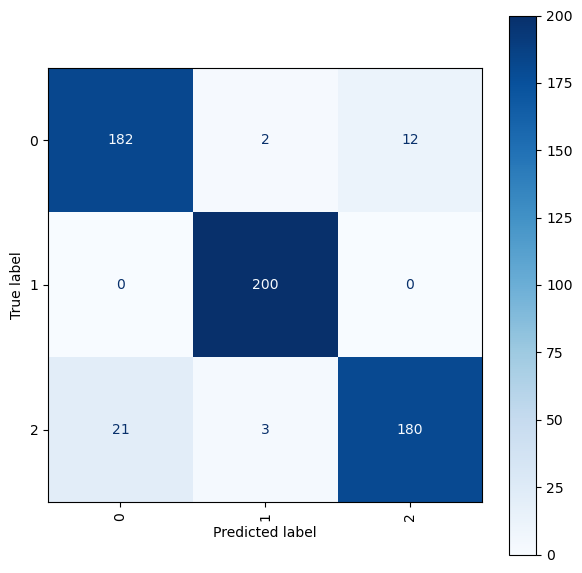

Learning Rate: 5e-05, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.8437, Accuracy: 75.00%,Validation Accuracy: 69.67%
Epoch [1/10], Step [60/150], Loss: 0.4220, Accuracy: 90.62%,Validation Accuracy: 73.67%
Epoch [1/10], Step [90/150], Loss: 0.5854, Accuracy: 81.25%,Validation Accuracy: 73.33%
Epoch [1/10], Step [120/150], Loss: 0.8516, Accuracy: 71.88%,Validation Accuracy: 78.67%
Epoch [1/10], Step [150/150], Loss: 0.6027, Accuracy: 75.00%,Validation Accuracy: 82.00%
Epoch [2/10], Step [30/150], Loss: 0.4281, Accuracy: 81.25%,Validation Accuracy: 80.00%
Epoch [2/10], Step [60/150], Loss: 0.3066, Accuracy: 90.62%,Validation Accuracy: 77.67%
Epoch [2/10], Step [90/150], Loss: 0.3144, Accuracy: 90.62%,Validation Accuracy: 83.33%
Epoch [2/10], Step [120/150], Loss: 0.3425, Accuracy: 87.50%,Validation Accuracy: 81.50%
Epoch [2/10], Step [150/150], Loss: 0.2756, Accuracy: 93.75%,Validation Accuracy: 83.50%


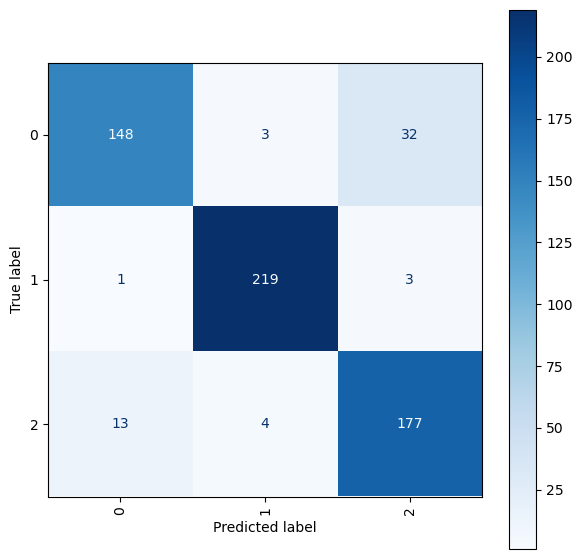

Learning Rate: 0.0001, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.5113, Accuracy: 78.91%,Validation Accuracy: 80.33%
Epoch [2/10], Step [30/38], Loss: 0.3212, Accuracy: 89.84%,Validation Accuracy: 89.00%
Epoch [3/10], Step [30/38], Loss: 0.2464, Accuracy: 89.84%,Validation Accuracy: 87.50%
Epoch [4/10], Step [30/38], Loss: 0.3671, Accuracy: 89.84%,Validation Accuracy: 91.17%
Epoch [5/10], Step [30/38], Loss: 0.1240, Accuracy: 94.53%,Validation Accuracy: 93.50%
Epoch [6/10], Step [30/38], Loss: 0.2782, Accuracy: 87.50%,Validation Accuracy: 93.33%
Epoch [7/10], Step [30/38], Loss: 0.1398, Accuracy: 94.53%,Validation Accuracy: 95.00%
Epoch [8/10], Step [30/38], Loss: 0.1685, Accuracy: 92.19%,Validation Accuracy: 93.00%
Epoch [9/10], Step [30/38], Loss: 0.1620, Accuracy: 93.75%,Validation Accuracy: 94.17%
Epoch [10/10], Step [30/38], Loss: 0.0929, Accuracy: 96.09%,Validation Accuracy: 93.17%
######## Tr

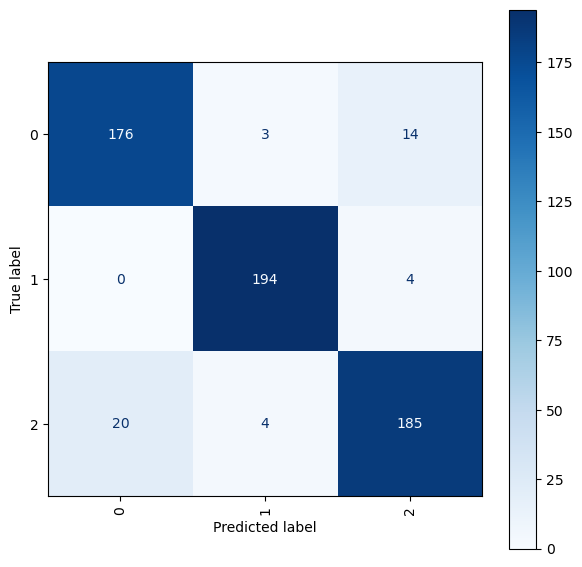

Learning Rate: 0.0001, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.5929, Accuracy: 68.75%,Validation Accuracy: 71.00%
Epoch [1/10], Step [60/75], Loss: 0.5402, Accuracy: 76.56%,Validation Accuracy: 79.50%
Epoch [2/10], Step [30/75], Loss: 0.1728, Accuracy: 93.75%,Validation Accuracy: 86.50%
Epoch [2/10], Step [60/75], Loss: 0.3819, Accuracy: 84.38%,Validation Accuracy: 84.67%
Epoch [3/10], Step [30/75], Loss: 0.3527, Accuracy: 84.38%,Validation Accuracy: 87.50%
Epoch [3/10], Step [60/75], Loss: 0.2815, Accuracy: 87.50%,Validation Accuracy: 90.67%
Epoch [4/10], Step [30/75], Loss: 0.2191, Accuracy: 92.19%,Validation Accuracy: 90.83%
Epoch [4/10], Step [60/75], Loss: 0.2907, Accuracy: 89.06%,Validation Accuracy: 88.33%
Epoch [5/10], Step [30/75], Loss: 0.3668, Accuracy: 84.38%,Validation Accuracy: 89.83%
Epoch [5/10], Step [60/75], Loss: 0.2389, Accuracy: 93.75%,Validation Accuracy: 91.17%
Epoch [6/10],

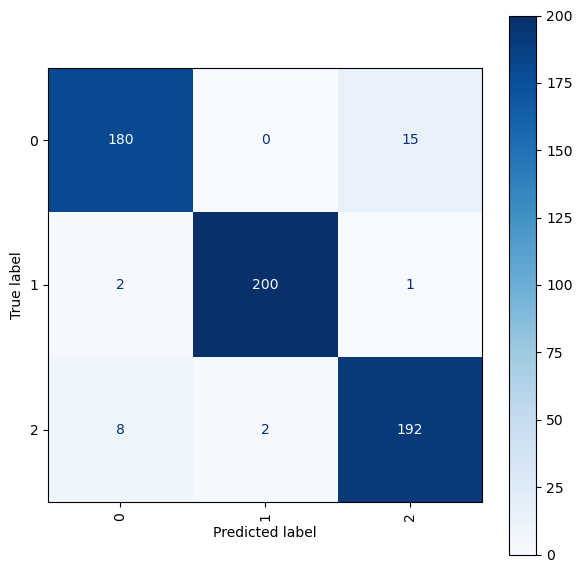

Learning Rate: 0.0001, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.8075, Accuracy: 68.75%,Validation Accuracy: 72.33%
Epoch [1/10], Step [60/150], Loss: 0.5141, Accuracy: 75.00%,Validation Accuracy: 69.17%
Epoch [1/10], Step [90/150], Loss: 0.3643, Accuracy: 87.50%,Validation Accuracy: 74.83%
Epoch [1/10], Step [120/150], Loss: 0.4633, Accuracy: 81.25%,Validation Accuracy: 80.67%
Epoch [1/10], Step [150/150], Loss: 0.4267, Accuracy: 78.12%,Validation Accuracy: 83.33%
Epoch [2/10], Step [30/150], Loss: 0.4320, Accuracy: 84.38%,Validation Accuracy: 84.50%
Epoch [2/10], Step [60/150], Loss: 0.4409, Accuracy: 81.25%,Validation Accuracy: 83.50%
Epoch [2/10], Step [90/150], Loss: 0.3372, Accuracy: 84.38%,Validation Accuracy: 85.00%
Epoch [2/10], Step [120/150], Loss: 0.3179, Accuracy: 90.62%,Validation Accuracy: 84.00%
Epoch [2/10], Step [150/150], Loss: 0.3495, Accuracy: 81.25%,Validation Accuracy: 85.00%

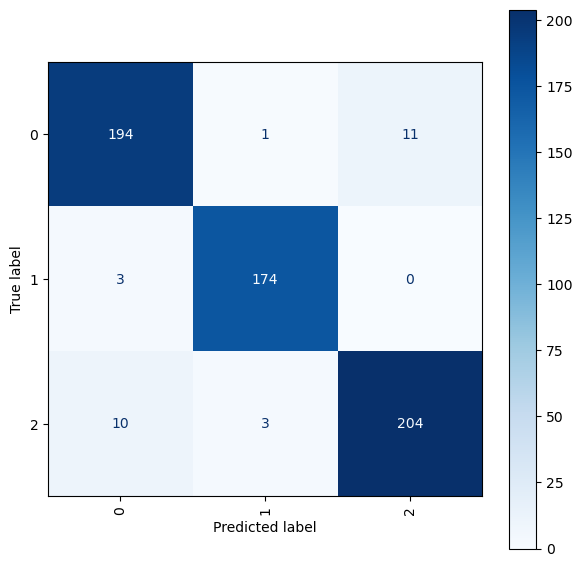

Learning Rate: 0.0005, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.4957, Accuracy: 81.25%,Validation Accuracy: 80.67%
Epoch [2/10], Step [30/38], Loss: 0.2897, Accuracy: 88.28%,Validation Accuracy: 86.83%
Epoch [3/10], Step [30/38], Loss: 0.3294, Accuracy: 87.50%,Validation Accuracy: 86.67%
Epoch [4/10], Step [30/38], Loss: 0.1974, Accuracy: 93.75%,Validation Accuracy: 90.00%
Epoch [5/10], Step [30/38], Loss: 0.2750, Accuracy: 86.72%,Validation Accuracy: 89.00%
Epoch [6/10], Step [30/38], Loss: 0.2213, Accuracy: 90.62%,Validation Accuracy: 91.50%
Epoch [7/10], Step [30/38], Loss: 0.3020, Accuracy: 88.28%,Validation Accuracy: 88.67%
Epoch [8/10], Step [30/38], Loss: 0.1517, Accuracy: 93.75%,Validation Accuracy: 94.50%
Epoch [9/10], Step [30/38], Loss: 0.1715, Accuracy: 92.97%,Validation Accuracy: 92.67%
Epoch [10/10], Step [30/38], Loss: 0.1227, Accuracy: 96.09%,Validation Accuracy: 94.00%
######## Tr

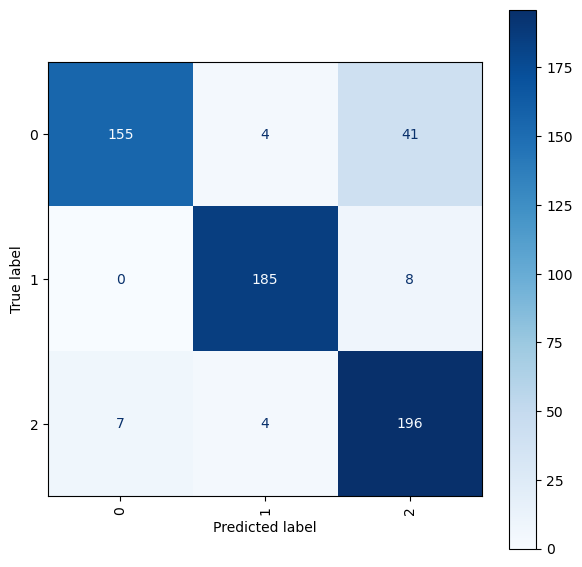

Learning Rate: 0.0005, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.5736, Accuracy: 75.00%,Validation Accuracy: 71.67%
Epoch [1/10], Step [60/75], Loss: 0.5158, Accuracy: 75.00%,Validation Accuracy: 79.00%
Epoch [2/10], Step [30/75], Loss: 0.4622, Accuracy: 85.94%,Validation Accuracy: 79.17%
Epoch [2/10], Step [60/75], Loss: 0.4893, Accuracy: 78.12%,Validation Accuracy: 81.33%
Epoch [3/10], Step [30/75], Loss: 0.3699, Accuracy: 84.38%,Validation Accuracy: 81.50%
Epoch [3/10], Step [60/75], Loss: 0.2959, Accuracy: 87.50%,Validation Accuracy: 84.17%
Epoch [4/10], Step [30/75], Loss: 0.2482, Accuracy: 95.31%,Validation Accuracy: 86.83%
Epoch [4/10], Step [60/75], Loss: 0.3730, Accuracy: 85.94%,Validation Accuracy: 88.67%
Epoch [5/10], Step [30/75], Loss: 0.0897, Accuracy: 96.88%,Validation Accuracy: 88.17%
Epoch [5/10], Step [60/75], Loss: 0.3590, Accuracy: 85.94%,Validation Accuracy: 86.83%
Epoch [6/10],

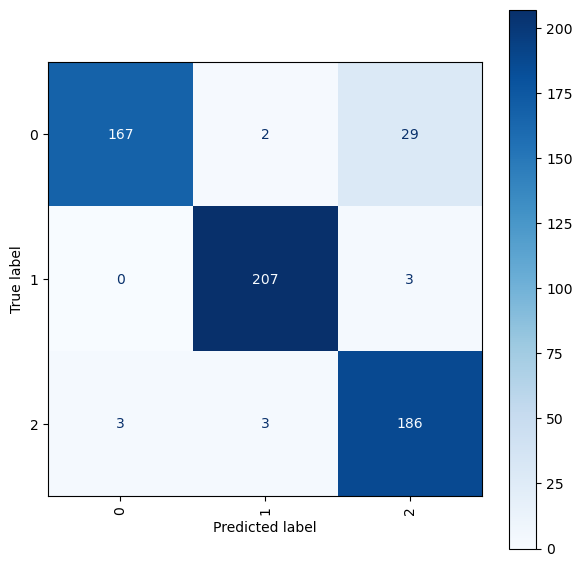

Learning Rate: 0.0005, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.6926, Accuracy: 62.50%,Validation Accuracy: 69.50%
Epoch [1/10], Step [60/150], Loss: 0.4961, Accuracy: 78.12%,Validation Accuracy: 68.33%
Epoch [1/10], Step [90/150], Loss: 0.3974, Accuracy: 81.25%,Validation Accuracy: 76.83%
Epoch [1/10], Step [120/150], Loss: 0.5019, Accuracy: 81.25%,Validation Accuracy: 79.17%
Epoch [1/10], Step [150/150], Loss: 0.4032, Accuracy: 81.25%,Validation Accuracy: 83.67%
Epoch [2/10], Step [30/150], Loss: 0.4844, Accuracy: 87.50%,Validation Accuracy: 82.67%
Epoch [2/10], Step [60/150], Loss: 0.3395, Accuracy: 84.38%,Validation Accuracy: 85.50%
Epoch [2/10], Step [90/150], Loss: 0.8025, Accuracy: 62.50%,Validation Accuracy: 80.83%
Epoch [2/10], Step [120/150], Loss: 0.7732, Accuracy: 75.00%,Validation Accuracy: 83.00%
Epoch [2/10], Step [150/150], Loss: 0.5510, Accuracy: 75.00%,Validation Accuracy: 85.67%

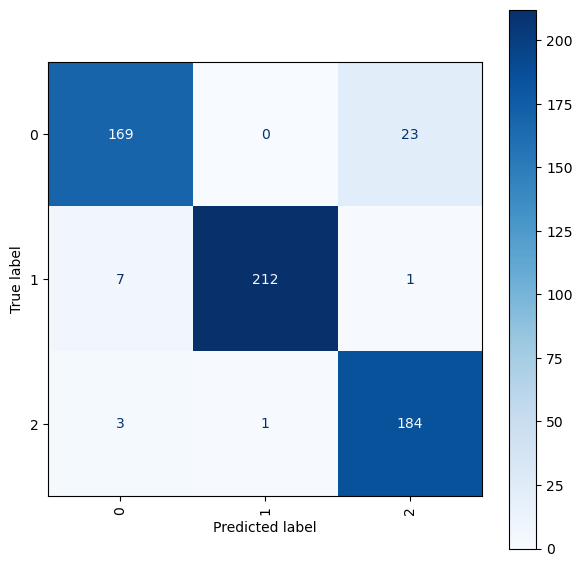

Learning Rate: 0.001, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.5768, Accuracy: 77.34%,Validation Accuracy: 80.17%
Epoch [2/10], Step [30/38], Loss: 0.6371, Accuracy: 76.56%,Validation Accuracy: 85.17%
Epoch [3/10], Step [30/38], Loss: 0.3891, Accuracy: 85.94%,Validation Accuracy: 85.83%
Epoch [4/10], Step [30/38], Loss: 0.3319, Accuracy: 82.81%,Validation Accuracy: 91.17%
Epoch [5/10], Step [30/38], Loss: 0.3357, Accuracy: 82.03%,Validation Accuracy: 89.67%
Epoch [6/10], Step [30/38], Loss: 0.2685, Accuracy: 85.94%,Validation Accuracy: 90.00%
Epoch [7/10], Step [30/38], Loss: 0.1233, Accuracy: 96.09%,Validation Accuracy: 92.17%
Epoch [8/10], Step [30/38], Loss: 0.2514, Accuracy: 91.41%,Validation Accuracy: 90.83%
Epoch [9/10], Step [30/38], Loss: 0.1752, Accuracy: 95.31%,Validation Accuracy: 94.00%
Epoch [10/10], Step [30/38], Loss: 0.2529, Accuracy: 92.19%,Validation Accuracy: 95.17%
######## Tra

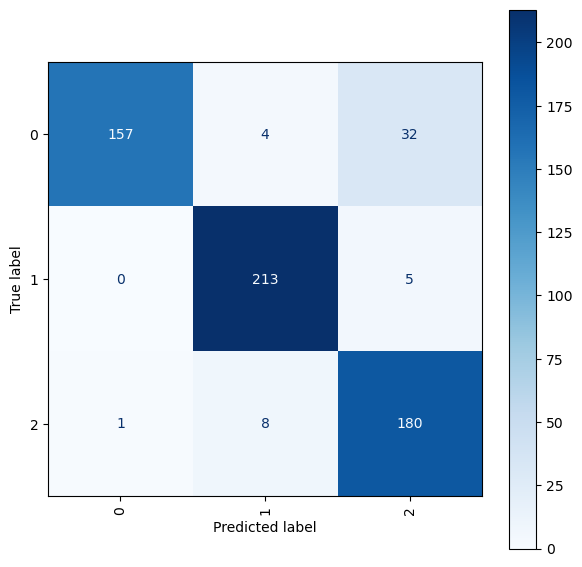

Learning Rate: 0.001, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.4937, Accuracy: 76.56%,Validation Accuracy: 77.33%
Epoch [1/10], Step [60/75], Loss: 0.4954, Accuracy: 75.00%,Validation Accuracy: 83.17%
Epoch [2/10], Step [30/75], Loss: 0.2737, Accuracy: 92.19%,Validation Accuracy: 86.00%
Epoch [2/10], Step [60/75], Loss: 0.2760, Accuracy: 92.19%,Validation Accuracy: 86.67%
Epoch [3/10], Step [30/75], Loss: 0.3715, Accuracy: 87.50%,Validation Accuracy: 88.17%
Epoch [3/10], Step [60/75], Loss: 0.2975, Accuracy: 87.50%,Validation Accuracy: 87.33%
Epoch [4/10], Step [30/75], Loss: 0.2811, Accuracy: 90.62%,Validation Accuracy: 90.50%
Epoch [4/10], Step [60/75], Loss: 0.2565, Accuracy: 90.62%,Validation Accuracy: 91.33%
Epoch [5/10], Step [30/75], Loss: 0.3258, Accuracy: 90.62%,Validation Accuracy: 90.50%
Epoch [5/10], Step [60/75], Loss: 0.3836, Accuracy: 81.25%,Validation Accuracy: 93.33%
Epoch [6/10], 

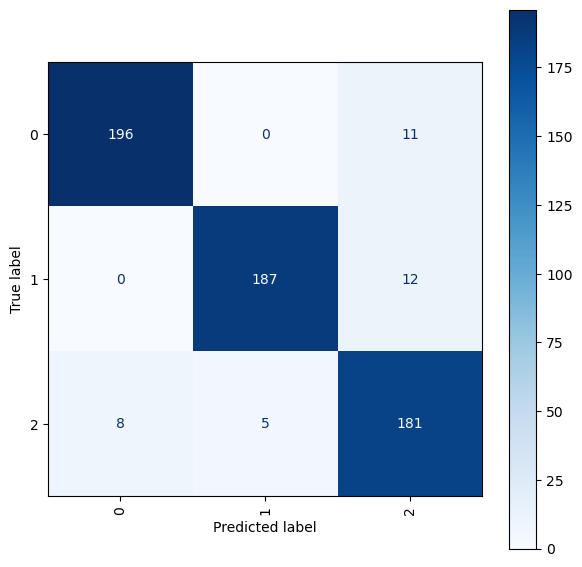

Learning Rate: 0.001, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.6317, Accuracy: 78.12%,Validation Accuracy: 74.00%
Epoch [1/10], Step [60/150], Loss: 0.5517, Accuracy: 71.88%,Validation Accuracy: 73.17%
Epoch [1/10], Step [90/150], Loss: 0.6330, Accuracy: 68.75%,Validation Accuracy: 76.33%
Epoch [1/10], Step [120/150], Loss: 0.4334, Accuracy: 81.25%,Validation Accuracy: 75.67%
Epoch [1/10], Step [150/150], Loss: 0.5848, Accuracy: 75.00%,Validation Accuracy: 82.33%
Epoch [2/10], Step [30/150], Loss: 0.4734, Accuracy: 78.12%,Validation Accuracy: 81.83%
Epoch [2/10], Step [60/150], Loss: 0.3468, Accuracy: 87.50%,Validation Accuracy: 80.83%
Epoch [2/10], Step [90/150], Loss: 0.4625, Accuracy: 84.38%,Validation Accuracy: 86.17%
Epoch [2/10], Step [120/150], Loss: 0.3808, Accuracy: 87.50%,Validation Accuracy: 87.33%
Epoch [2/10], Step [150/150], Loss: 0.4048, Accuracy: 84.38%,Validation Accuracy: 84.17%


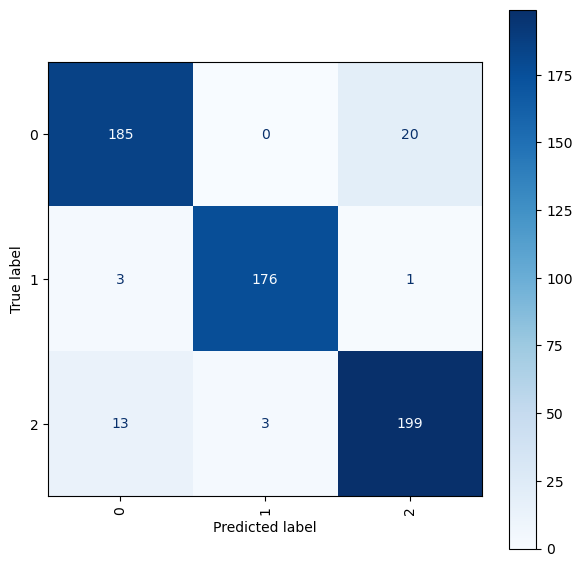

Learning Rate: 0.005, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.7405, Accuracy: 62.50%,Validation Accuracy: 63.00%
Epoch [2/10], Step [30/38], Loss: 0.5443, Accuracy: 79.69%,Validation Accuracy: 76.50%
Epoch [3/10], Step [30/38], Loss: 0.5010, Accuracy: 81.25%,Validation Accuracy: 79.33%
Epoch [4/10], Step [30/38], Loss: 0.5216, Accuracy: 81.25%,Validation Accuracy: 83.17%
Epoch [5/10], Step [30/38], Loss: 0.4079, Accuracy: 84.38%,Validation Accuracy: 82.00%
Epoch [6/10], Step [30/38], Loss: 0.3728, Accuracy: 83.59%,Validation Accuracy: 87.00%
Epoch [7/10], Step [30/38], Loss: 0.3815, Accuracy: 82.81%,Validation Accuracy: 86.83%
Epoch [8/10], Step [30/38], Loss: 0.2577, Accuracy: 92.97%,Validation Accuracy: 88.00%
Epoch [9/10], Step [30/38], Loss: 0.2993, Accuracy: 87.50%,Validation Accuracy: 88.17%
Epoch [10/10], Step [30/38], Loss: 0.2282, Accuracy: 91.41%,Validation Accuracy: 89.00%
######## Tra

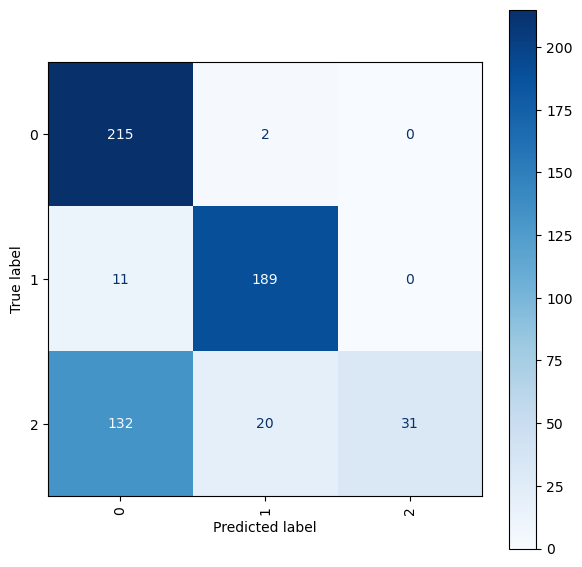

Learning Rate: 0.005, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.5643, Accuracy: 78.12%,Validation Accuracy: 67.17%
Epoch [1/10], Step [60/75], Loss: 0.6464, Accuracy: 76.56%,Validation Accuracy: 75.33%
Epoch [2/10], Step [30/75], Loss: 0.7604, Accuracy: 68.75%,Validation Accuracy: 73.67%
Epoch [2/10], Step [60/75], Loss: 0.5693, Accuracy: 76.56%,Validation Accuracy: 79.67%
Epoch [3/10], Step [30/75], Loss: 0.4990, Accuracy: 81.25%,Validation Accuracy: 86.83%
Epoch [3/10], Step [60/75], Loss: 0.4612, Accuracy: 84.38%,Validation Accuracy: 83.33%
Epoch [4/10], Step [30/75], Loss: 0.4141, Accuracy: 82.81%,Validation Accuracy: 83.50%
Epoch [4/10], Step [60/75], Loss: 0.4222, Accuracy: 81.25%,Validation Accuracy: 83.83%
Epoch [5/10], Step [30/75], Loss: 0.3306, Accuracy: 92.19%,Validation Accuracy: 85.50%
Epoch [5/10], Step [60/75], Loss: 0.3026, Accuracy: 87.50%,Validation Accuracy: 85.83%
Epoch [6/10], 

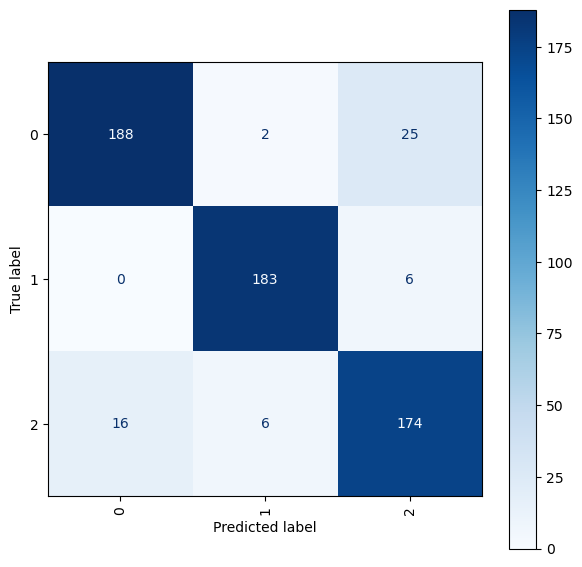

Learning Rate: 0.005, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 1.0592, Accuracy: 56.25%,Validation Accuracy: 59.33%
Epoch [1/10], Step [60/150], Loss: 0.8320, Accuracy: 59.38%,Validation Accuracy: 63.33%
Epoch [1/10], Step [90/150], Loss: 1.0173, Accuracy: 56.25%,Validation Accuracy: 66.33%
Epoch [1/10], Step [120/150], Loss: 0.5220, Accuracy: 81.25%,Validation Accuracy: 65.50%
Epoch [1/10], Step [150/150], Loss: 0.5625, Accuracy: 75.00%,Validation Accuracy: 72.17%
Epoch [2/10], Step [30/150], Loss: 0.7890, Accuracy: 62.50%,Validation Accuracy: 75.83%
Epoch [2/10], Step [60/150], Loss: 0.6474, Accuracy: 71.88%,Validation Accuracy: 74.17%
Epoch [2/10], Step [90/150], Loss: 0.4249, Accuracy: 84.38%,Validation Accuracy: 76.67%
Epoch [2/10], Step [120/150], Loss: 0.3962, Accuracy: 84.38%,Validation Accuracy: 75.67%
Epoch [2/10], Step [150/150], Loss: 0.4104, Accuracy: 75.00%,Validation Accuracy: 78.00%


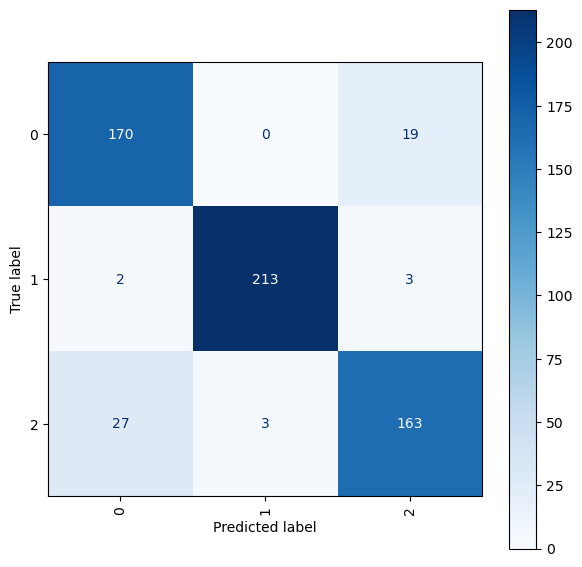

Learning Rate: 0.01, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.5298, Accuracy: 73.44%,Validation Accuracy: 69.83%
Epoch [2/10], Step [30/38], Loss: 0.3760, Accuracy: 81.25%,Validation Accuracy: 80.33%
Epoch [3/10], Step [30/38], Loss: 0.4320, Accuracy: 80.47%,Validation Accuracy: 77.50%
Epoch [4/10], Step [30/38], Loss: 0.4457, Accuracy: 84.38%,Validation Accuracy: 81.17%
Epoch [5/10], Step [30/38], Loss: 0.4025, Accuracy: 83.59%,Validation Accuracy: 81.83%
Epoch [6/10], Step [30/38], Loss: 0.2845, Accuracy: 91.41%,Validation Accuracy: 88.67%
Epoch [7/10], Step [30/38], Loss: 0.2117, Accuracy: 91.41%,Validation Accuracy: 89.83%
Epoch [8/10], Step [30/38], Loss: 0.2695, Accuracy: 89.84%,Validation Accuracy: 90.33%
Epoch [9/10], Step [30/38], Loss: 0.2837, Accuracy: 86.72%,Validation Accuracy: 89.33%
Epoch [10/10], Step [30/38], Loss: 0.3633, Accuracy: 84.38%,Validation Accuracy: 89.50%
######## Trai

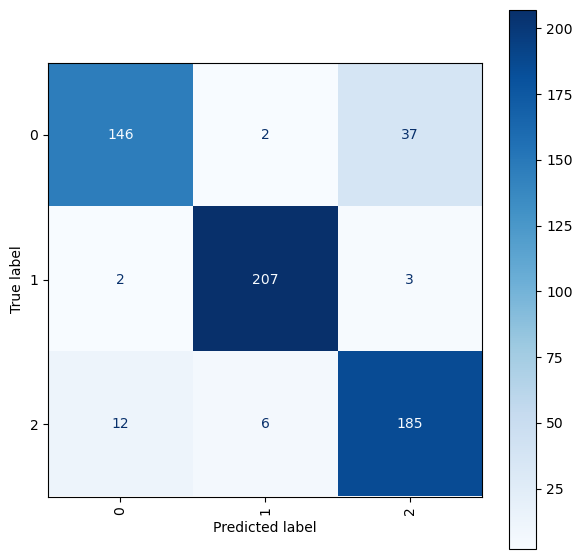

Learning Rate: 0.01, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.8916, Accuracy: 60.94%,Validation Accuracy: 69.33%
Epoch [1/10], Step [60/75], Loss: 0.4858, Accuracy: 79.69%,Validation Accuracy: 70.67%
Epoch [2/10], Step [30/75], Loss: 0.5312, Accuracy: 70.31%,Validation Accuracy: 73.67%
Epoch [2/10], Step [60/75], Loss: 0.5322, Accuracy: 78.12%,Validation Accuracy: 75.67%
Epoch [3/10], Step [30/75], Loss: 0.4687, Accuracy: 75.00%,Validation Accuracy: 83.00%
Epoch [3/10], Step [60/75], Loss: 0.5147, Accuracy: 75.00%,Validation Accuracy: 77.83%
Epoch [4/10], Step [30/75], Loss: 0.5174, Accuracy: 79.69%,Validation Accuracy: 86.17%
Epoch [4/10], Step [60/75], Loss: 0.3928, Accuracy: 84.38%,Validation Accuracy: 84.83%
Epoch [5/10], Step [30/75], Loss: 0.3474, Accuracy: 87.50%,Validation Accuracy: 86.00%
Epoch [5/10], Step [60/75], Loss: 0.3417, Accuracy: 82.81%,Validation Accuracy: 88.83%
Epoch [6/10], S

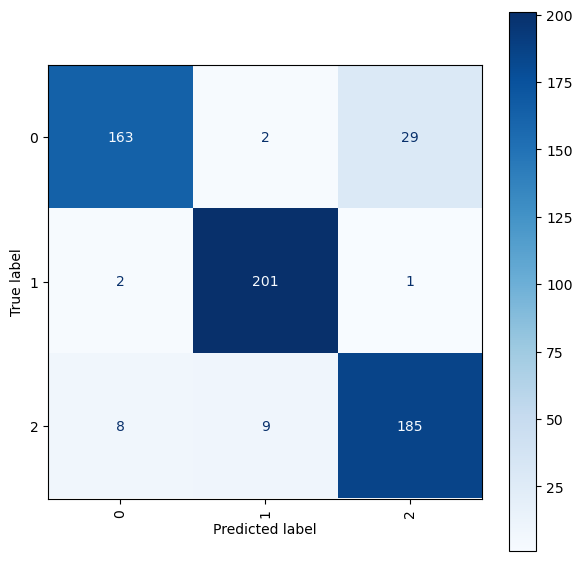

Learning Rate: 0.01, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 1.2035, Accuracy: 59.38%,Validation Accuracy: 56.83%
Epoch [1/10], Step [60/150], Loss: 1.0607, Accuracy: 53.12%,Validation Accuracy: 64.83%
Epoch [1/10], Step [90/150], Loss: 0.5165, Accuracy: 78.12%,Validation Accuracy: 63.00%
Epoch [1/10], Step [120/150], Loss: 0.5097, Accuracy: 78.12%,Validation Accuracy: 68.50%
Epoch [1/10], Step [150/150], Loss: 0.7009, Accuracy: 62.50%,Validation Accuracy: 70.17%
Epoch [2/10], Step [30/150], Loss: 0.7115, Accuracy: 59.38%,Validation Accuracy: 69.17%
Epoch [2/10], Step [60/150], Loss: 0.5009, Accuracy: 81.25%,Validation Accuracy: 69.50%
Epoch [2/10], Step [90/150], Loss: 0.4153, Accuracy: 81.25%,Validation Accuracy: 71.83%
Epoch [2/10], Step [120/150], Loss: 0.5994, Accuracy: 65.62%,Validation Accuracy: 73.50%
Epoch [2/10], Step [150/150], Loss: 0.6178, Accuracy: 78.12%,Validation Accuracy: 76.67%
E

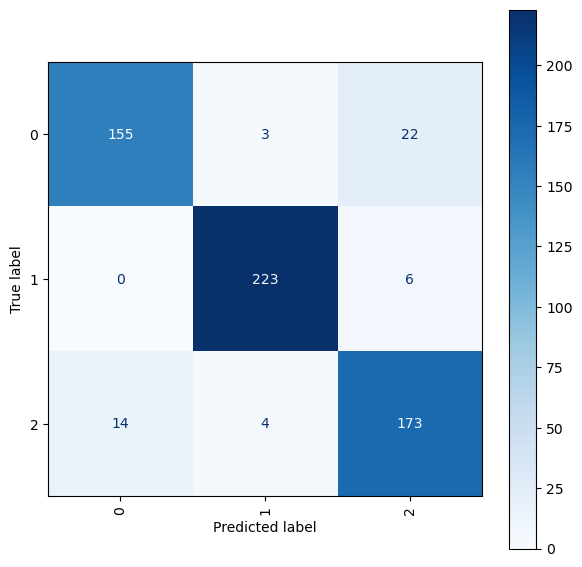

Learning Rate: 0.05, Batch Size: 128 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/38], Loss: 0.9913, Accuracy: 46.88%,Validation Accuracy: 58.50%
Epoch [2/10], Step [30/38], Loss: 0.6682, Accuracy: 70.31%,Validation Accuracy: 66.50%
Epoch [3/10], Step [30/38], Loss: 0.5992, Accuracy: 75.00%,Validation Accuracy: 72.83%
Epoch [4/10], Step [30/38], Loss: 0.5730, Accuracy: 78.12%,Validation Accuracy: 75.33%
Epoch [5/10], Step [30/38], Loss: 0.5999, Accuracy: 70.31%,Validation Accuracy: 77.67%
Epoch [6/10], Step [30/38], Loss: 0.3449, Accuracy: 87.50%,Validation Accuracy: 82.17%
Epoch [7/10], Step [30/38], Loss: 0.3862, Accuracy: 85.16%,Validation Accuracy: 80.50%
Epoch [8/10], Step [30/38], Loss: 0.4401, Accuracy: 82.81%,Validation Accuracy: 84.17%
Epoch [9/10], Step [30/38], Loss: 0.2220, Accuracy: 89.84%,Validation Accuracy: 86.00%
Epoch [10/10], Step [30/38], Loss: 0.5381, Accuracy: 75.78%,Validation Accuracy: 87.83%
######## Trai

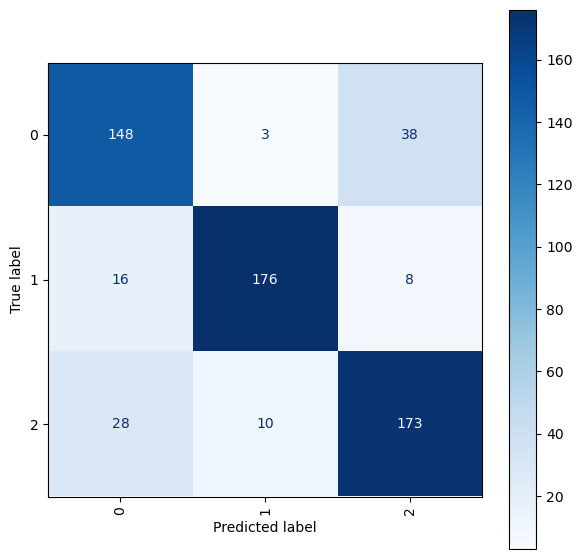

Learning Rate: 0.05, Batch Size: 64 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/75], Loss: 0.9514, Accuracy: 40.62%,Validation Accuracy: 49.17%
Epoch [1/10], Step [60/75], Loss: 0.8701, Accuracy: 48.44%,Validation Accuracy: 52.50%
Epoch [2/10], Step [30/75], Loss: 0.7380, Accuracy: 68.75%,Validation Accuracy: 60.67%
Epoch [2/10], Step [60/75], Loss: 0.7436, Accuracy: 65.62%,Validation Accuracy: 58.17%
Epoch [3/10], Step [30/75], Loss: 0.7245, Accuracy: 64.06%,Validation Accuracy: 64.83%
Epoch [3/10], Step [60/75], Loss: 0.8963, Accuracy: 60.94%,Validation Accuracy: 65.50%
Epoch [4/10], Step [30/75], Loss: 0.7862, Accuracy: 65.62%,Validation Accuracy: 76.17%
Epoch [4/10], Step [60/75], Loss: 0.6322, Accuracy: 75.00%,Validation Accuracy: 74.00%
Epoch [5/10], Step [30/75], Loss: 0.4122, Accuracy: 85.94%,Validation Accuracy: 75.83%
Epoch [5/10], Step [60/75], Loss: 0.6051, Accuracy: 75.00%,Validation Accuracy: 77.83%
Epoch [6/10], S

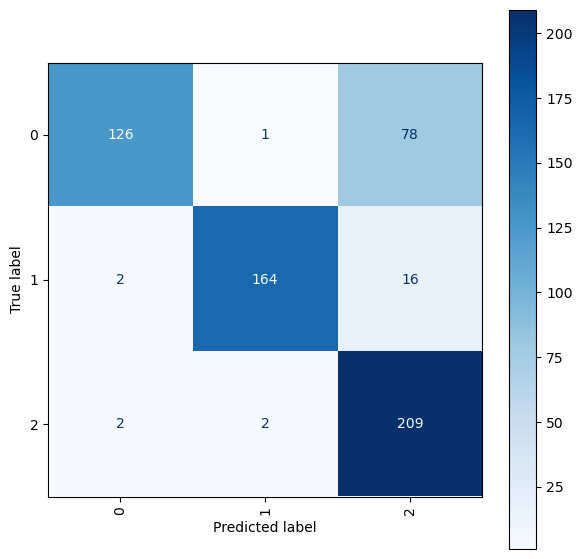

Learning Rate: 0.05, Batch Size: 32 , Loss function:  Cross Entropy Loss , Optimizer:  Adam Optimizer
Device: cuda
Epoch [1/10], Step [30/150], Loss: 0.9721, Accuracy: 43.75%,Validation Accuracy: 49.67%
Epoch [1/10], Step [60/150], Loss: 0.5150, Accuracy: 62.50%,Validation Accuracy: 58.33%
Epoch [1/10], Step [90/150], Loss: 0.7934, Accuracy: 62.50%,Validation Accuracy: 61.00%
Epoch [1/10], Step [120/150], Loss: 0.7438, Accuracy: 65.62%,Validation Accuracy: 71.17%
Epoch [1/10], Step [150/150], Loss: 0.5655, Accuracy: 81.25%,Validation Accuracy: 75.17%
Epoch [2/10], Step [30/150], Loss: 0.8352, Accuracy: 43.75%,Validation Accuracy: 63.33%
Epoch [2/10], Step [60/150], Loss: 0.4319, Accuracy: 84.38%,Validation Accuracy: 77.67%
Epoch [2/10], Step [90/150], Loss: 0.7195, Accuracy: 78.12%,Validation Accuracy: 70.67%
Epoch [2/10], Step [120/150], Loss: 0.6457, Accuracy: 75.00%,Validation Accuracy: 74.33%
Epoch [2/10], Step [150/150], Loss: 0.5170, Accuracy: 78.12%,Validation Accuracy: 74.67%
E

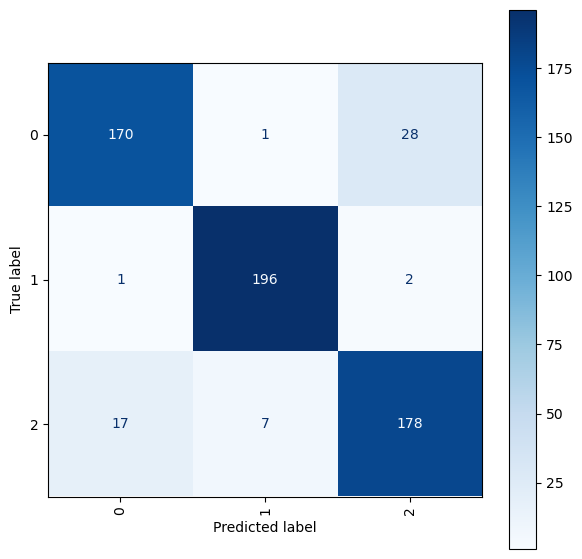

In [10]:
MODELS=[]
hyper_parameters = []
train_acc_hyper_paramaters=[]
train_acc_valid_hyper_paramaters=[]
train_loss_hyper_paramaters=[]

train_acc_hyper_paramaters_step=[]
train_acc_valid_hyper_paramaters_step=[]
train_loss_hyper_paramaters_step=[]
test_loss=[]

#different batch sizes
batch_sizes=[128,64,32]
#different learning rates
learning_rates= [0.00001,0.00005,0.0001,0.0005,0.001,.005,0.01,0.05]
#Setting the number of epochs
epochs=10


for learning_rate in learning_rates:
   for batch_size in batch_sizes:
      #Model ResNet   
      model3 = models.resnet18(weights=None)
      model3.fc = nn.Linear(512,len(labels_map))# fine tuning the last layer
      stringCrit="Cross Entropy Loss"
      criterion=nn.CrossEntropyLoss()
      #Optimizer Function 
      stringOPTM="Adam Optimizer"
      optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

      hyper_parameters.append(["Learning Rate: "+str(learning_rate)," Batch Size: "+str(batch_size),stringCrit,stringOPTM])
      print("Learning Rate: "+str(learning_rate)+", Batch Size: "+str(batch_size),", Loss function: ",stringCrit,", Optimizer: ",stringOPTM)
      
      train_loader, test_loader, val_loader = data_loader(path,batch_size, inputDimension)
      tempLoss,tempAccuracy,tempModel,tempValidAccuracy,tempStepAccuracy,tempStepValidation,tempStepLoss = train(epochs,model3,train_loader,criterion,optimizer,val_loader)

      
      train_loss_hyper_paramaters.append(tempLoss)
      train_acc_hyper_paramaters.append(tempAccuracy)
      train_acc_valid_hyper_paramaters.append(tempValidAccuracy)

      train_acc_valid_hyper_paramaters_step.append(tempStepValidation)      
      train_acc_hyper_paramaters_step.append(tempStepAccuracy)
      train_loss_hyper_paramaters_step.append(tempStepLoss)

      cmReturned,temp_test_loss = test(model3,"cuda",test_loader)
      test_loss.append([temp_test_loss,learning_rate])
      if cmReturned is not None:
          fig, ax = plt.subplots(figsize=(7, 7))
          ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
          plt.show()   
      MODELS.append(tempModel)

## Storing the loss,training accuracy,validation accuracy in a file

In [11]:
# Loading the lists from the file
with open(saveFilePath, 'wb') as f:
    data = {
        'hyper_parameters': hyper_parameters,
        'train_acc_hyper_paramaters': train_acc_hyper_paramaters,
        'train_acc_valid_hyper_paramaters': train_acc_valid_hyper_paramaters,
        'train_loss_hyper_paramaters': train_loss_hyper_paramaters,
        'train_acc_hyper_paramaters_step': train_acc_hyper_paramaters_step,
        'train_acc_valid_hyper_paramaters_step': train_acc_valid_hyper_paramaters_step,
        'train_loss_hyper_paramaters_step': train_loss_hyper_paramaters_step,
        'test_loss': test_loss,
    }
    pickle.dump(data, f)

## Loading the loss,training accuracy,validation accuracy in a file

In [ ]:
# Loading the lists from the file
saveFilePath="C:/Users/vshar/Documents/hyperparameters_ASL_Final_Hyper.pkl"
saveModelPath="C:/Users/vshar/Documents"
with open(saveFilePath, 'rb') as f:
    data = pickle.load(f)
    hyper_parameters = data['hyper_parameters']
    train_acc_hyper_paramaters = data['train_acc_hyper_paramaters']
    train_acc_valid_hyper_paramaters = data['train_acc_valid_hyper_paramaters']
    train_loss_hyper_paramaters = data['train_loss_hyper_paramaters']
    train_acc_hyper_paramaters_step = data['train_acc_hyper_paramaters_step']
    train_acc_valid_hyper_paramaters_step = data['train_acc_valid_hyper_paramaters_step']
    train_loss_hyper_paramaters_step = data['train_loss_hyper_paramaters_step']
    test_loss=data['test_loss']

In [12]:
i=1
saveModelPath="C:/Users/vshar/Documents/TASK1"
for i in range(len(MODELS)):
    torch.save(MODELS[i], saveModelPath+"/COMP6321_ResNet_Task1_CancerDataset_Model_Final_HyperParamaterTuning"+str(i)+".pth")